# **This notebook contains the code for visualizing the flow around four rotating cylinderers centered around a common point.**
The code is heavily based on the code published by:
https://notebook.community/hrayatnia/SciPy/ipython%20gallery/AeroPython-master/lessons/06_Lesson06_vortexLift

Consider the flow of an ideal fluid around a cylinder in two dimensions.
The stream lines are defined by:



In [1]:
import math
import numpy
from matplotlib import pyplot

In [2]:
N = 200                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid
u_inf= 0.6                               # free stream speed
alpha= numpy.pi/3                        # inclination of the cross with respect to the positive x direction.

From this point on we have to differenciate each of the three cylinders

Cylinder 1

In [3]:
kappa = 0.25                          # strength of the doublet
x_doublet1, y_doublet1 =numpy.cos(alpha+numpy.pi), numpy.sin(alpha+ numpy.pi)          # location of the doublet
                                                    

Cylinder 2

In [4]:
kappa = 0.25                          # strength of the doublet
x_doublet2, y_doublet2 =numpy.cos(alpha+numpy.pi/2), numpy.sin(alpha+ numpy.pi/2)       # location of the doublet


Cylinder 3

In [5]:
kappa = 0.25                           # strength of the doublet
x_doublet3, y_doublet3 =numpy.cos(alpha), numpy.sin(alpha)                                  # location of the doublet


Cylinder 4

In [6]:
kappa = 0.25                           # strength of the doublet
x_doublet4, y_doublet4 =numpy.cos(alpha-numpy.pi/2), numpy.sin(alpha-numpy.pi/2)       # location of the doublet

In [7]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """Returns the velocity field generated by a doublet.
    
    Arguments
    ---------
    strength -- strength of the doublet.
    xd, yd -- coordinates of the doublet.
    X, Y -- mesh grid.
    """
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """Returns the stream-function generated by a doublet.
    
    Arguments
    ---------
    strength -- strength of the doublet.
    xd, yd -- coordinates of the doublet.
    X, Y -- mesh grid.
    """
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

Cylinder 1

In [8]:
# computes the velocity field on the mesh grid
u_doublet1, v_doublet1 = get_velocity_doublet(kappa, x_doublet1, y_doublet1, X, Y)

# computes the stream-function on the mesh grid
psi_doublet1 = get_stream_function_doublet(kappa, x_doublet1, y_doublet1, X, Y)

# freestream velocity components
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# stream-function of the freestream flow
psi_freestream = u_inf * Y

# superposition of the doublet on the freestream flow
u1 = u_freestream + u_doublet1
v1 = v_freestream + v_doublet1
psi = psi_freestream + psi_doublet1

Cylinder 2

In [9]:
# computes the velocity field on the mesh grid
u_doublet2, v_doublet2 = get_velocity_doublet(kappa, x_doublet2, y_doublet2, X, Y)

# computes the stream-function on the mesh grid
psi_doublet2 = get_stream_function_doublet(kappa, x_doublet2, y_doublet2, X, Y)

# freestream velocity components
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# stream-function of the freestream flow
psi_freestream = u_inf * Y

# superposition of the doublet on the freestream flow
u2 = u_freestream + u_doublet2
v2 = v_freestream + v_doublet2
psi2 = psi_freestream + psi_doublet2

Cylinder 3

In [10]:
# computes the velocity field on the mesh grid
u_doublet3, v_doublet3 = get_velocity_doublet(kappa, x_doublet3, y_doublet3, X, Y)

# computes the stream-function on the mesh grid
psi_doublet3 = get_stream_function_doublet(kappa, x_doublet3, y_doublet3, X, Y)

# freestream velocity components
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# stream-function of the freestream flow
psi_freestream = u_inf * Y

# superposition of the doublet on the freestream flow
u3 = u_freestream + u_doublet3
v3 = v_freestream + v_doublet3
psi3 = psi_freestream + psi_doublet3

Cylinder 4

In [11]:
# computes the velocity field on the mesh grid
u_doublet4, v_doublet4 = get_velocity_doublet(kappa, x_doublet4, y_doublet4, X, Y)

# computes the stream-function on the mesh grid
psi_doublet4 = get_stream_function_doublet(kappa, x_doublet4, y_doublet4, X, Y)

# freestream velocity components
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# stream-function of the freestream flow
psi_freestream = u_inf * Y

# superposition of the doublet on the freestream flow
u4 = u_freestream + u_doublet4
v4 = v_freestream + v_doublet4
psi4 = psi_freestream + psi_doublet4

Sum the effects of the presence of the three cylinders

In [12]:
u=u1+u2+u3+u4
v=v1+v2+v3+v4

C:\Users\luiggi\anaconda3\lib\site-packages\matplotlib\patches.py:3027: RuntimeWarning: invalid value encountered in double_scalars
  cos_t, sin_t = head_length / head_dist, head_width / head_dist


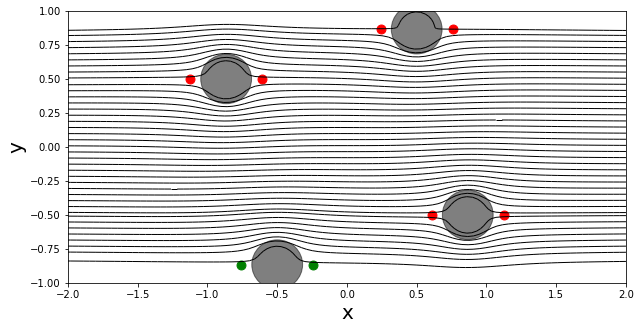

In [13]:
# plots the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=20)
pyplot.ylabel('y', fontsize=20)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
#pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.streamplot(X, Y, u, v, density=3, linewidth=1, color='k', arrowsize=0, minlength=0.8)
#pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculates the cylinder radius and adds it to the figure
R = math.sqrt(kappa/(4*math.pi*u_inf))
#circle = pyplot.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
circle1 = pyplot.Circle((x_doublet1, y_doublet1), radius=R, color='k', alpha=0.5)
circle2= pyplot.Circle((x_doublet2, y_doublet2), radius=R, color='k', alpha=0.5)
circle3= pyplot.Circle((x_doublet3, y_doublet3), radius=R, color='k', alpha=0.5)
circle4= pyplot.Circle((x_doublet4, y_doublet4), radius=R, color='k', alpha=0.5)
pyplot.gca().add_patch(circle1)
pyplot.gca().add_patch(circle2)
pyplot.gca().add_patch(circle3)
pyplot.gca().add_patch(circle4)
# calculates the stagnation points and adds it to the figure
# First cylinder
x_stagn1, y_stagn1 = +math.sqrt(kappa/(2*math.pi*u_inf))+x_doublet1, y_doublet1
x_stagn2, y_stagn2 = -math.sqrt(kappa/(2*math.pi*u_inf))+x_doublet1, y_doublet1
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');
# Second cylinder
x_stagn1, y_stagn1 = +math.sqrt(kappa/(2*math.pi*u_inf))+x_doublet2, y_doublet2
x_stagn2, y_stagn2 = -math.sqrt(kappa/(2*math.pi*u_inf))+x_doublet2, y_doublet2
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='r', s=80, marker='o');
# Third cylinder
x_stagn1, y_stagn1 = +math.sqrt(kappa/(2*math.pi*u_inf))+x_doublet3, y_doublet3
x_stagn2, y_stagn2 = -math.sqrt(kappa/(2*math.pi*u_inf))+x_doublet3, y_doublet3
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='r', s=80, marker='o');
# Fourth cylinder
x_stagn1, y_stagn1 = +math.sqrt(kappa/(2*math.pi*u_inf))+x_doublet4, y_doublet4
x_stagn2, y_stagn2 = -math.sqrt(kappa/(2*math.pi*u_inf))+x_doublet4, y_doublet4
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='r', s=80, marker='o');

Add rotation


In [14]:
gamma1 = 4.0                                  # strength of the vortex
x_vortex1, y_vortex1 = x_doublet1, y_doublet1    # location of the vortex
gamma2 = -4.0                                  # strength of the vortex
x_vortex2, y_vortex2 = x_doublet2, y_doublet2    # location of the vortex
gamma3 = 4.0                                  # strength of the vortex
x_vortex3, y_vortex3 = x_doublet3, y_doublet3    # location of the vortex
gamma4 = -4.0                                  # strength of the vortex
x_vortex4, y_vortex4 = x_doublet4, y_doublet4    # location of the vortex


In [15]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """Returns the velocity field generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    """Returns the stream-function generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

Cylinder one

In [16]:
# computes the velocity field on the mesh grid
u_vortex1, v_vortex1 = get_velocity_vortex(gamma1, x_vortex1, y_vortex1, X, Y)

# computes the stream-function on the mesh grid
psi_vortex1 = get_stream_function_vortex(gamma1, x_vortex1, y_vortex1, X, Y)

Cylinder two

In [17]:
# computes the velocity field on the mesh grid
u_vortex2, v_vortex2 = get_velocity_vortex(gamma2, x_vortex2, y_vortex2, X, Y)

# computes the stream-function on the mesh grid
psi_vortex2 = get_stream_function_vortex(gamma2, x_vortex2, y_vortex2, X, Y)

Cylinder three

In [18]:
# computes the velocity field on the mesh grid
u_vortex3, v_vortex3 = get_velocity_vortex(gamma3, x_vortex3, y_vortex3, X, Y)

# computes the stream-function on the mesh grid
psi_vortex3 = get_stream_function_vortex(gamma3, x_vortex3, y_vortex3, X, Y)

Cylinder four

In [19]:
# computes the velocity field on the mesh grid
u_vortex4, v_vortex4 = get_velocity_vortex(gamma4, x_vortex4, y_vortex4, X, Y)

# computes the stream-function on the mesh grid
psi_vortex4 = get_stream_function_vortex(gamma4, x_vortex4, y_vortex4, X, Y)

Cylinder one

In [20]:
# superposition of the doublet and the vortex on the freestream flow
u1 = u_freestream + u_doublet1 + u_vortex1
v1 = v_freestream + v_doublet1 + v_vortex1
psi1 = psi_freestream + psi_doublet1 + psi_vortex1

Cylinder two

In [21]:
# superposition of the doublet and the vortex on the freestream flow
u2 = u_freestream + u_doublet2 + u_vortex2
v2 = v_freestream + v_doublet2 + v_vortex2
psi2 = psi_freestream + psi_doublet2 + psi_vortex2

Cylinder three

In [22]:
# superposition of the doublet and the vortex on the freestream flow
u3 = u_freestream + u_doublet3 + u_vortex3
v3 = v_freestream + v_doublet3 + v_vortex3
psi3 = psi_freestream + psi_doublet3 + psi_vortex3

Cylinder four

In [23]:
# superposition of the doublet and the vortex on the freestream flow
u4 = u_freestream + u_doublet4 + u_vortex4
v4 = v_freestream + v_doublet4 + v_vortex4
psi4 = psi_freestream + psi_doublet4 + psi_vortex4

Sum the effects of the presence of the three rotating cylinders

In [24]:
u=u1+u2+u3+u4
v=v1+v2+v3+v4

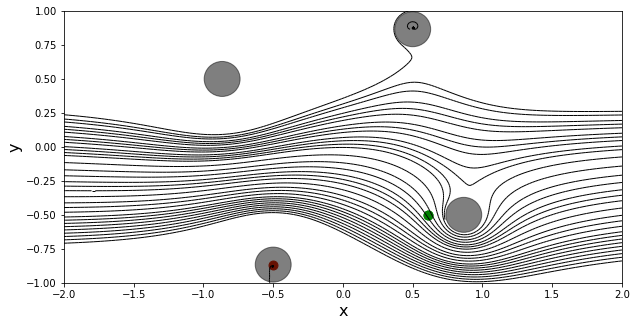

In [25]:
# calculates cylinder radius
R = math.sqrt(kappa/(2*math.pi*u_inf))/2

# calculates the stagnation points
##x_stagn1, y_stagn1 = +math.sqrt(R**2-(gamma/(4*math.pi*u_inf))**2), -gamma/(4*math.pi*u_inf)
##x_stagn2, y_stagn2 = -math.sqrt(R**2-(gamma/(4*math.pi*u_inf))**2), -gamma/(4*math.pi*u_inf)

# plots the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
#pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1.5, arrowstyle='->')
pyplot.streamplot(X, Y, u, v, density=5, linewidth=1, color='k', arrowsize=0, minlength=0.9)
circle1 = pyplot.Circle((x_doublet1, y_doublet1), radius=R, color='k', alpha=0.5)
circle2 = pyplot.Circle((x_doublet2, y_doublet2), radius=R, color='k', alpha=0.5)
circle3 = pyplot.Circle((x_doublet3, y_doublet3), radius=R, color='k', alpha=0.5)
circle4 = pyplot.Circle((x_doublet4, y_doublet4), radius=R, color='k', alpha=0.5)
pyplot.gca().add_patch(circle1)
pyplot.gca().add_patch(circle2)
pyplot.gca().add_patch(circle3)
pyplot.gca().add_patch(circle4)
pyplot.scatter(x_vortex1, y_vortex1, color='#CD2305', s=80, marker='o')
pyplot.scatter([x_stagn2, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');